In [10]:
#import part 
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd
import seaborn as sb

In [5]:
path = "train.csv"
df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/Library/Code/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Code/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


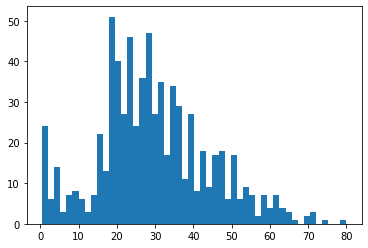

In [29]:
Survived = df["Survived"]
Age = df["Age"]
#plt.bar(Survived,Age)
#plt.hist(Age,50)
#plt.show()


#for i in df["Survived"]:
   # if i = 0
sur_mask = df["Survived"] >0

df[sur_mask]


Age_in_survived = df["Age"]
plt.hist(Age_in_survived,50)
plt.show()

/Library/Code/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Code/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


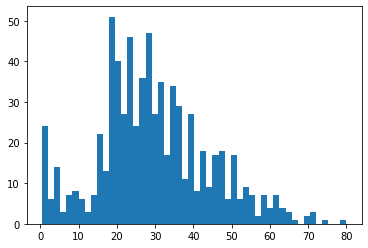

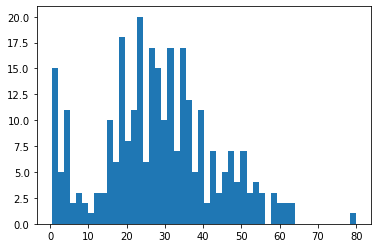

In [113]:

Age = df["Age"]
#plt.bar(Survived,Age)
plt.hist(Age,50)
plt.show()





mask = df['Survived'].isin([1])
survived = df[mask]
plt.hist(survived["Age"],50)
#plt.hist(df['Age'],50)
plt.show()
#sur_mask = df["Survived"]>0
#Age_in_survived = df[sur_mask]["Age"]
#plt.hist(Age_in_survived,50)




In [114]:
#for i in df["Age"]:
    #if i == Na:
     #   df.drop([i])
    #else:
       # None     
df_filtered = df[df['Age'].isnull() == False] 

#mask = [str(i).replace('.','').isdigit() for i in list((df['Age']))]# isdigit applied into str. 
#df_filtered = df[mask]
#print(df_filtered.head(15)) 
#print(df_filtered.shape) 

for i,row in df_filtered.iterrows():
    if row["Sex"] == 'male':
        df_filtered.loc[i,['Sex']] = 1
        
    else:
        df_filtered.loc[i,['Sex']]  = 0
        
for i,row in df_filtered.iterrows():
    if row["Embarked"] == 'S':
        df_filtered.loc[i,['Embarked']] = 1
    elif row["Embarked"] == 'C':
        df_filtered.loc[i,['Embarked']] = 2
    elif row["Embarked"] == 'Q':
        df_filtered.loc[i,['Embarked']] = 3
        
data = df_filtered[["Survived","Pclass","Sex","Age","Embarked"]]

data


/Library/Code/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,1
1,1,1,0,38.0,2
2,1,3,0,26.0,1
3,1,1,0,35.0,1
4,0,3,1,35.0,1
...,...,...,...,...,...
885,0,3,0,39.0,3
886,0,2,1,27.0,1
887,1,1,0,19.0,1
889,1,1,1,26.0,2


In [16]:

X=df['Pclass','Sex','Age','SibSp','Parch']

split_percentage = 0.75 # choosing 75% data for training,25% for testing
split = int(split_percentage*len(Df)) #split the data
# Train data set
X_train = X[:split]
y_train = y[:split]
# Test data set
X_test = X[split:]
y_test = y[split:]
cls = SVC().fit(X_train, y_train) # using the SVC model to predict y based on X, we set before
#classification is like hyperplane to sperate dataset based on their features, there are two features
#here there are two categories 1 and -1

accuracy_train = accuracy_score(y_train, cls.predict(X_train))

accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('Train Accuracy:{: .2f}%'.format(accuracy_train*100))

print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

KeyError: ('Pclass', 'Sex', 'Age', 'SibSp', 'Parch')